# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [667]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [668]:
#Type your code here
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [669]:
file_path = "/content/drive/MyDrive/submission/Dataset_inisiasi.csv" # Update with the correct path in your Drive
df = pd.read_csv(file_path)
df.head()

,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [670]:
# Struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB


In [671]:
# Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64


In [672]:
# penghapusan missing value
df_cleaned = df.dropna(subset=['gk'])

# Cek kembali apakah masih ada missing values
print(df_cleaned.isnull().sum())

provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
dtype: int64


In [673]:
# Statistik Deskriptif
df_cleaned.describe()

,tahun,gk
count,5261.000000,5261.000000
mean,2018.244250,303904.185516
std,2.491855,158176.024903
min,2013.000000,48561.000000
25%,2016.000000,144674.000000
50%,2018.000000,313294.000000
75%,2020.000000,410188.000000
max,2022.000000,872843.000000


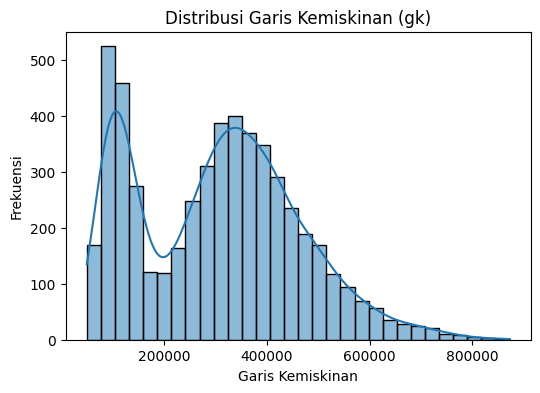

In [674]:
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned['gk'], bins=30, kde=True)
plt.title("Distribusi Garis Kemiskinan (gk)")
plt.xlabel("Garis Kemiskinan")
plt.ylabel("Frekuensi")
plt.show()

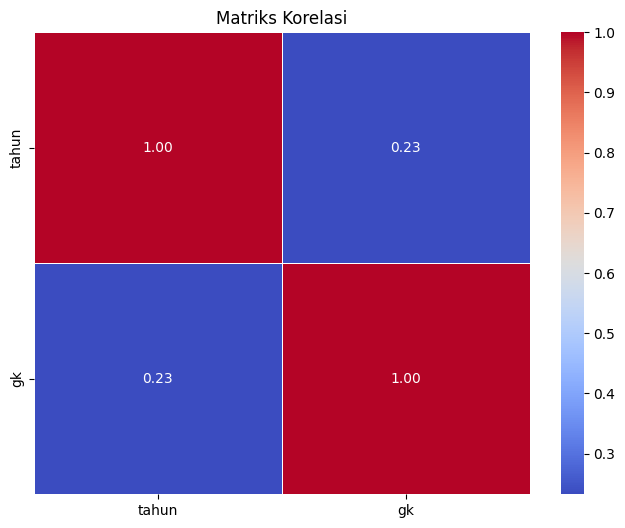

In [675]:
# Memilih hanya kolom numerik
numeric_df = df_cleaned.select_dtypes(include=['number'])

# Menghitung korelasi
correlation_matrix = numeric_df.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

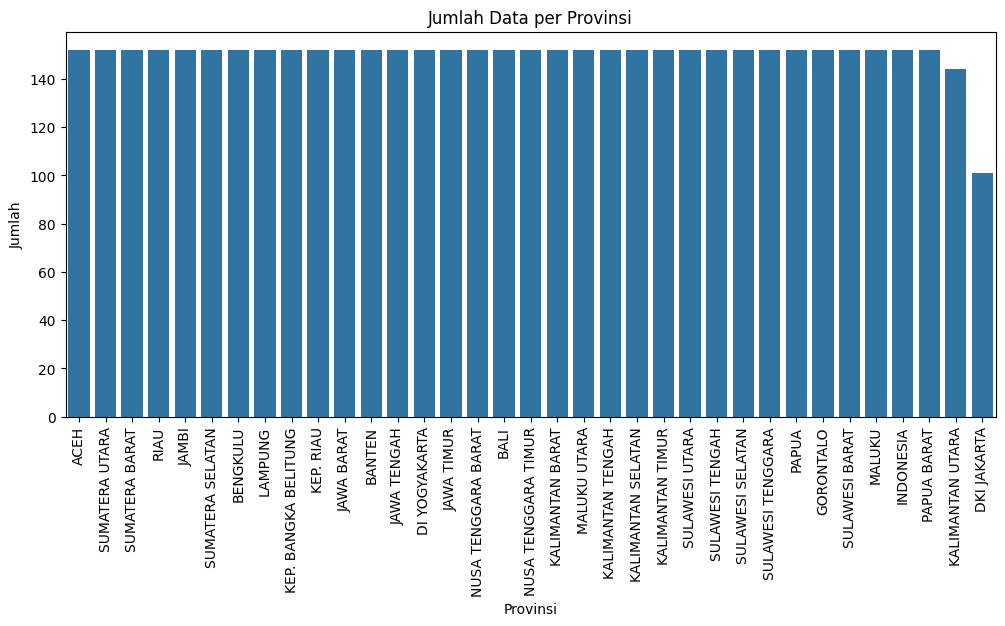

In [676]:
# Visualisasi jumlah data berdasarkan provinsi
plt.figure(figsize=(12, 5))
sns.countplot(x=df_cleaned['provinsi'], order=df_cleaned['provinsi'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Jumlah Data per Provinsi")
plt.xlabel("Provinsi")
plt.ylabel("Jumlah")
plt.show()

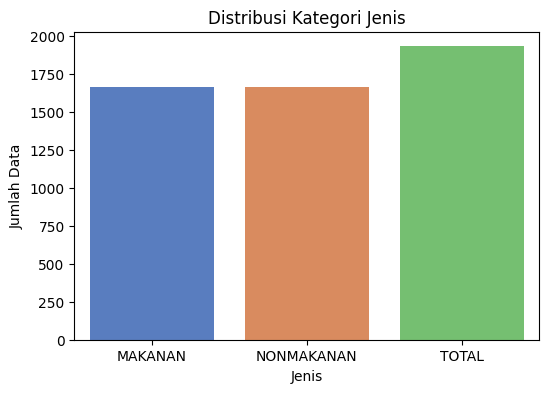

In [677]:
# Visualisasi jumlah data berdasarkan jenis
plt.figure(figsize=(6, 4))
sns.countplot(x='jenis', data=df_cleaned, hue='jenis', palette="muted", legend=False)
plt.title("Distribusi Kategori Jenis")
plt.xlabel("Jenis")
plt.ylabel("Jumlah Data")
plt.show()

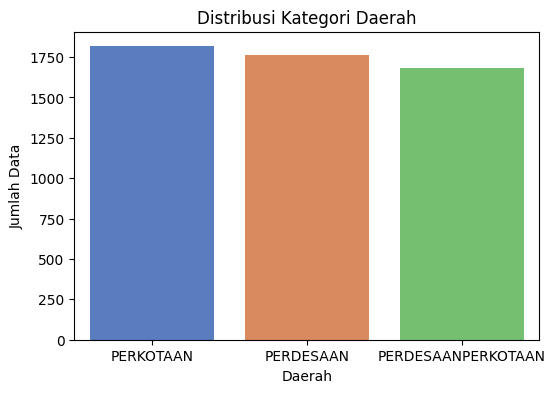

In [678]:
# Visualisasi jumlah data berdasarkan daerah
plt.figure(figsize=(6, 4))
sns.countplot(x='daerah', data=df_cleaned, hue='daerah', palette="muted", legend=False)
plt.title("Distribusi Kategori Daerah")
plt.xlabel("Daerah")
plt.ylabel("Jumlah Data")
plt.show()

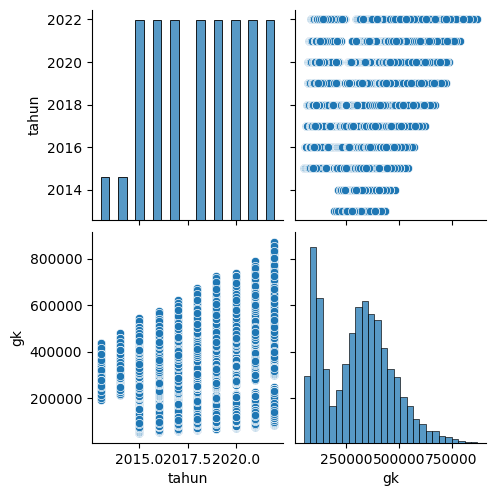

In [679]:
#pairplot
sns.pairplot(numeric_df)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [680]:
# Menghapus baris dengan nilai NaN di kolom 'gk'
df_cleaned = df_cleaned.dropna(subset=['gk'])

# Mengecek kembali apakah masih ada missing values
print(df_cleaned.isnull().sum())

provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
dtype: int64


In [681]:
# Mengecek jumlah data duplikat
duplikat = df_cleaned.duplicated().sum()
print(f"Jumlah data duplikat: {duplikat}")

Jumlah data duplikat: 0


In [682]:
# Pilih hanya kolom numerik
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi fitur numerik ke dalam rentang [0, 1]
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# Menampilkan hasil normalisasi
print(df_cleaned.head())

  provinsi    jenis     daerah     tahun    periode        gk
0     ACEH  MAKANAN  PERKOTAAN  0.222222      MARET  0.297393
1     ACEH  MAKANAN  PERKOTAAN  0.222222  SEPTEMBER  0.307622
2     ACEH  MAKANAN  PERKOTAAN  0.333333      MARET  0.312614
3     ACEH  MAKANAN  PERKOTAAN  0.333333  SEPTEMBER  0.329022
4     ACEH  MAKANAN  PERDESAAN  0.222222      MARET  0.301982


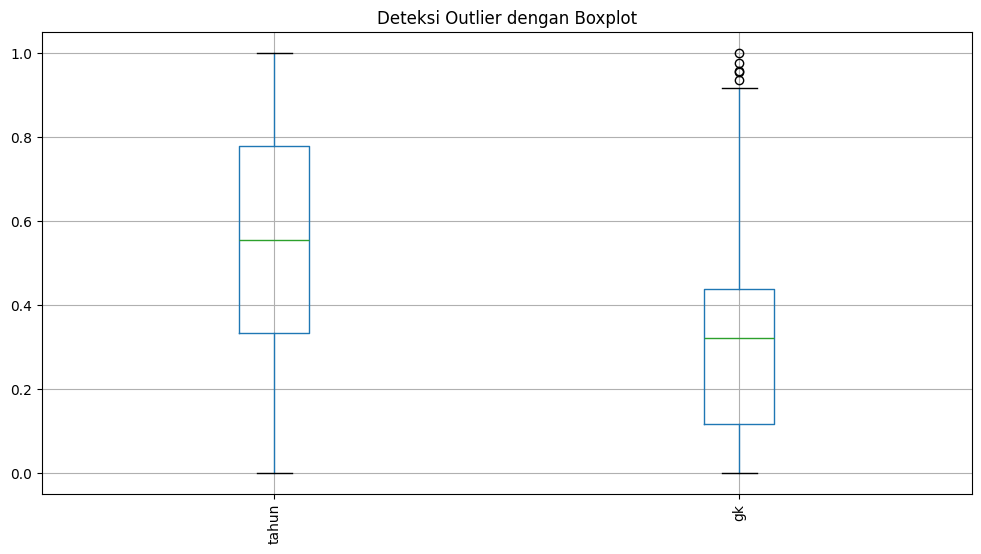

In [683]:
# Plot boxplot untuk Deteksi Outlier
plt.figure(figsize=(12, 6))
df_cleaned.select_dtypes(include=['number']).boxplot()
plt.xticks(rotation=90)
plt.title("Deteksi Outlier dengan Boxplot")
plt.show()

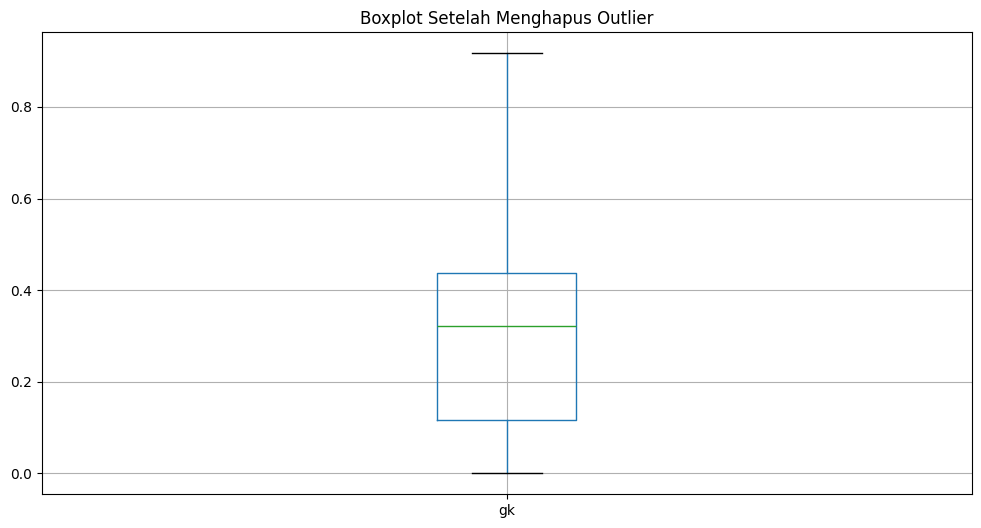

In [684]:
# penanganan outlier
# Menghitung batas IQR
Q1 = df_cleaned['gk'].quantile(0.25)
Q3 = df_cleaned['gk'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Menghapus outlier
df_cleaned = df_cleaned[(df_cleaned['gk'] >= batas_bawah) & (df_cleaned['gk'] <= batas_atas)]

# Cek kembali dengan boxplot setelah menghapus outlier
plt.figure(figsize=(12, 6))
df_cleaned[['gk']].boxplot()
plt.title("Boxplot Setelah Menghapus Outlier")
plt.show()


In [685]:
# Definisikan semua kolom kategorikal, termasuk 'periode'
categorical_cols = ['provinsi', 'jenis', 'daerah', 'periode']

# Inisialisasi LabelEncoder
label_encoders = {}

# Lakukan Label Encoding untuk setiap kolom kategorikal, termasuk 'periode'
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])  # Ubah nilai kategorikal ke angka
    label_encoders[col] = le  # Simpan encoder untuk decoding jika diperlukan

# Cek hasil encoding
df_cleaned.head()

,provinsi,jenis,daerah,tahun,periode,gk
0,0,0,2,0.222222,0,0.297393
1,0,0,2,0.222222,1,0.307622
2,0,0,2,0.333333,0,0.312614
3,0,0,2,0.333333,1,0.329022
4,0,0,0,0.222222,0,0.301982


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [686]:
# Pilih jumlah cluster berdasarkan elbow dan silhouette (misal k=3)
optimal_k = 3  # Ganti sesuai hasil terbaik

# Terapkan K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cleaned['Cluster'] = kmeans.fit_predict(df_cleaned[numerical_cols])

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

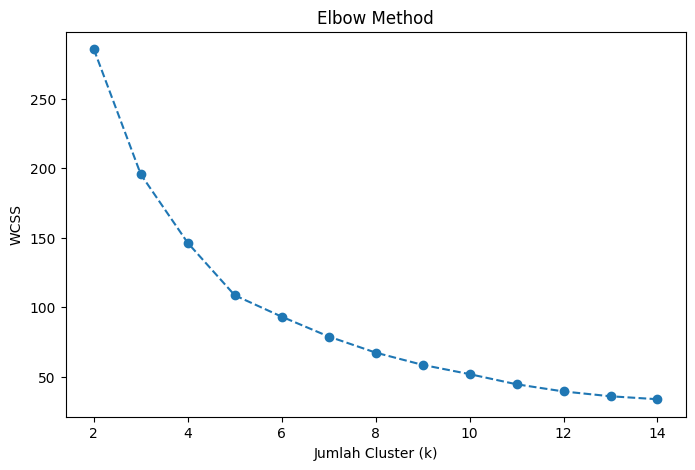

In [687]:
# Inisialisasi list untuk menyimpan nilai
wcss = []
silhouette_scores = []
K_range = range(2, 15)  # Coba jumlah cluster dari 2 sampai 14

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_cleaned[numerical_cols])

    # Simpan WCSS (Elbow Method)
    wcss.append(kmeans.inertia_)

    # Simpan Silhouette Score
    silhouette_avg = silhouette_score(df_cleaned[numerical_cols], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

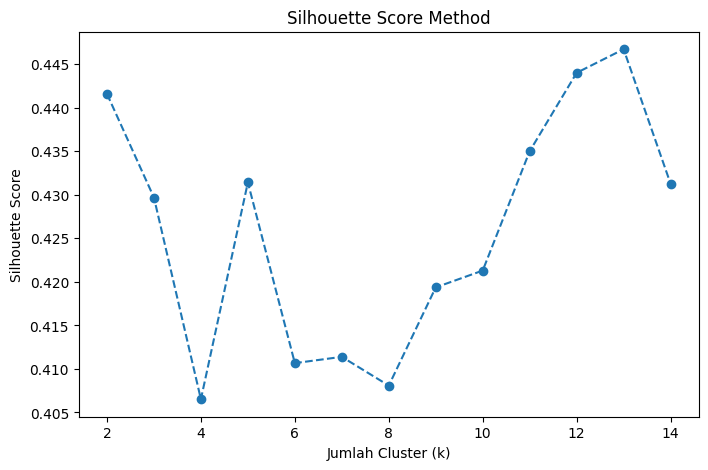

In [688]:
#  Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [689]:
# Hitung Silhouette Score Akhir
final_silhouette = silhouette_score(df_cleaned[numerical_cols], df_cleaned['Cluster'])
print(f'Silhouette Score akhir: {final_silhouette:.2f}')

Silhouette Score akhir: 0.43


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [690]:
# Ambil korelasi dengan target Cluster
numerical_cols = df_cleaned.select_dtypes(include=np.number).columns
correlation_with_cluster = df_cleaned[numerical_cols].corr()["Cluster"].abs()

# Pilih fitur dengan korelasi > 0.2 (bisa disesuaikan)
selected_features = correlation_with_cluster[correlation_with_cluster > 0.2].index.tolist()
print("Fitur yang dipilih:", selected_features)

# Gunakan hanya fitur yang dipilih
df_selected = df_cleaned[selected_features]

Fitur yang dipilih: ['gk', 'Cluster']


In [691]:
# Normalisasi ulang
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_selected)

# Clustering ulang
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_scaled)

# Evaluasi Silhouette Score
score = silhouette_score(df_scaled, labels)
print(f"Silhouette Score setelah Feature Selection: {score:.2f}")

Silhouette Score setelah Feature Selection: 0.73


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

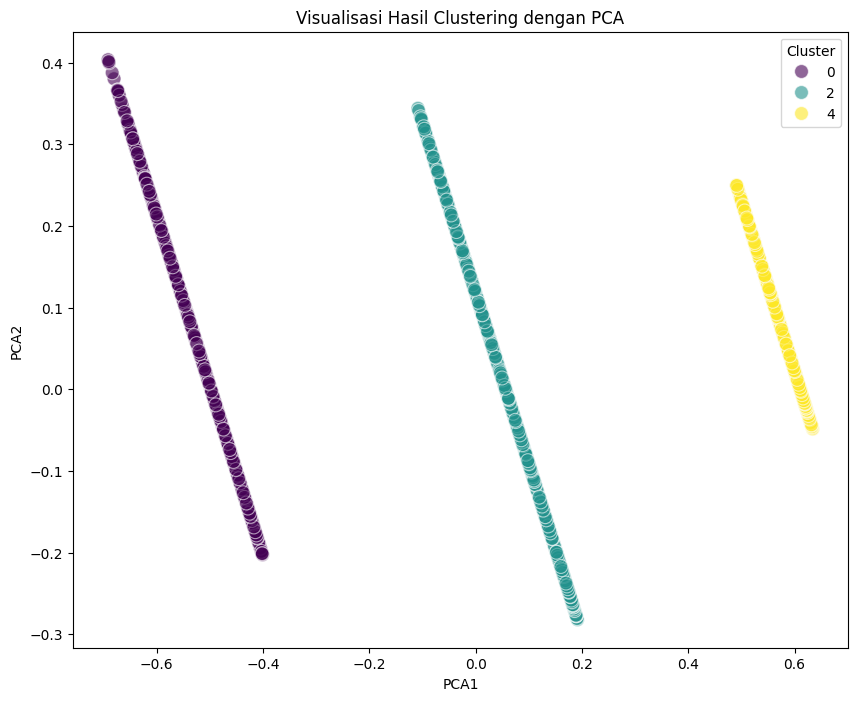

In [692]:
# Melakukan PCA untuk mereduksi data menjadi 2 dimensi
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)  # df_scaled adalah data setelah normalisasi

# Gabungkan hasil PCA dengan label cluster
df_pca_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca_df['Cluster'] = labels  # labels adalah hasil clustering

# Ubah label cluster dari [0,1,2] menjadi [0,2,4]
df_pca_df['Cluster'] = df_pca_df['Cluster'].map({0: 0, 1: 2, 2: 4})

# Plot hasil PCA dengan scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.6)

# Tambahkan title dan label
plt.title("Visualisasi Hasil Clustering dengan PCA")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title="Cluster", loc='best')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [693]:
df_cleaned['Cluster'] = labels  # 'labels' adalah hasil clustering dari K-Means

In [694]:
# Untuk 'provinsi', misalnya:
provinsi_encoder = label_encoders['provinsi']

# Inverse transform 'provinsi' di df_cleaned
df_cleaned['provinsi_asli'] = provinsi_encoder.inverse_transform(df_cleaned['provinsi'])

# Inverse transform untuk kolom 'jenis'
df_cleaned['jenis_asli'] = label_encoders['jenis'].inverse_transform(df_cleaned['jenis'])

# Inverse transform untuk kolom 'daerah'
df_cleaned['daerah_asli'] = label_encoders['daerah'].inverse_transform(df_cleaned['daerah'])

# Inverse transform untuk kolom 'daerah'
df_cleaned['periode_asli'] = label_encoders['periode'].inverse_transform(df_cleaned['periode'])

# Cek hasilnya
print(df_cleaned[['provinsi', 'provinsi_asli', 'jenis', 'jenis_asli', 'daerah', 'daerah_asli', 'periode', 'periode_asli']].head())

   provinsi provinsi_asli  jenis jenis_asli  daerah daerah_asli  periode  \
0         0          ACEH      0    MAKANAN       2   PERKOTAAN        0   
1         0          ACEH      0    MAKANAN       2   PERKOTAAN        1   
2         0          ACEH      0    MAKANAN       2   PERKOTAAN        0   
3         0          ACEH      0    MAKANAN       2   PERKOTAAN        1   
4         0          ACEH      0    MAKANAN       0   PERDESAAN        0   

  periode_asli  
0        MARET  
1    SEPTEMBER  
2        MARET  
3    SEPTEMBER  
4        MARET  


In [695]:
# Pastikan hanya menggunakan kolom yang sesuai dengan scaler
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns

# Pastikan scaler hanya digunakan pada fitur yang sesuai
if hasattr(scaler, 'feature_names_in_'):
    inverse_cols = scaler.feature_names_in_
else:
    inverse_cols = numerical_cols  # Asumsi semua kolom numerik sama

# Cek apakah jumlah fitur cocok
if len(inverse_cols) == df_cleaned[inverse_cols].shape[1]:
    df_cleaned[inverse_cols] = scaler.inverse_transform(df_cleaned[inverse_cols])
else:
    print("⚠️ Jumlah fitur tidak sesuai dengan scaler yang tersimpan!")

# Cek hasilnya
print(df_cleaned.head())

   provinsi  jenis  daerah     tahun  periode        gk  Cluster  \
0         0      0       2  0.222222        0  0.272742      2.0   
1         0      0       2  0.222222        1  0.282122      2.0   
2         0      0       2  0.333333        0  0.286701      2.0   
3         0      0       2  0.333333        1  0.301749      2.0   
4         0      0       0  0.222222        0  0.276950      2.0   

  provinsi_asli jenis_asli daerah_asli periode_asli  
0          ACEH    MAKANAN   PERKOTAAN        MARET  
1          ACEH    MAKANAN   PERKOTAAN    SEPTEMBER  
2          ACEH    MAKANAN   PERKOTAAN        MARET  
3          ACEH    MAKANAN   PERKOTAAN    SEPTEMBER  
4          ACEH    MAKANAN   PERDESAAN        MARET  


In [696]:
# Membuat Dataframe baru
# Buat salinan dataset asli
df_final = df.copy()

# Tambahkan label cluster ke dalam dataset asli
df_final["Cluster"] = df_cleaned["Cluster"]

# Cek hasil akhir
print(df_final.head())


  provinsi    jenis     daerah  tahun    periode        gk  Cluster
0     ACEH  MAKANAN  PERKOTAAN   2015      MARET  293697.0      2.0
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  302128.0      2.0
2     ACEH  MAKANAN  PERKOTAAN   2016      MARET  306243.0      2.0
3     ACEH  MAKANAN  PERKOTAAN   2016  SEPTEMBER  319768.0      2.0
4     ACEH  MAKANAN  PERDESAAN   2015      MARET  297479.0      2.0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [697]:
# Pastikan fitur numerik dan kategorikal dipilih dengan benar
numerical_cols = df_final.select_dtypes(include=['number']).columns
categorical_cols = df_final.select_dtypes(exclude=['number']).columns

# Agregasi untuk fitur numerik (mean, min, max)
agg_numerical = df_final.groupby("Cluster")[numerical_cols].agg(["min", "max", "mean"])

# Agregasi untuk fitur kategorikal (modus)
agg_categorical = df_final.groupby("Cluster")[categorical_cols].agg(lambda x: x.mode().iloc[0])

# Gabungkan hasil agregasi
cluster_summary = pd.concat([agg_numerical, agg_categorical], axis=1)

# Tampilkan hasil
print(cluster_summary)


         (tahun, min)  (tahun, max)  (tahun, mean)  (gk, min)  (gk, max)  \
Cluster                                                                    
0.0              2017          2022    2020.289720   296298.0   804517.0   
2.0              2013          2018    2015.908668    48561.0   573582.0   
4.0              2018          2022    2019.943172    63119.0   313620.0   

            (gk, mean)  (Cluster, min)  (Cluster, max)  (Cluster, mean)  \
Cluster                                                                   
0.0      459855.255841             0.0             0.0              0.0   
2.0      268338.479915             2.0             2.0              2.0   
4.0      146505.009330             4.0             4.0              4.0   

                 provinsi       jenis              daerah    periode  
Cluster                                                               
0.0      KALIMANTAN UTARA       TOTAL           PERKOTAAN  SEPTEMBER  
2.0             GORONTALO     

Tulis hasil interpretasinya di sini.
1. Cluster 0: Pendapatan tinggi, tinggal di perkotaan, pengeluaran besar
2. Cluster 2: Pendapatan menengah, tinggal di perkotaan
3. Cluster 4:Pendapatan rendah, banyak pengeluaran non-makanan, tinggal di daerah campuran

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Tahun:** 2020.29 (Min: 2017, Max: 2022)
- **Rata-rata gk:** 459,855 (Min: 296,298, Max: 804,517)  
- **Provinsi:** Kalimantan Utara
- **Jenis:** Total
- **Daerah:** Perkotaan
- **Periode:** September
- **Analisis:** Klaster ini mencakup gk yang cukup tinggi (rata-rata 459 ribu) dan mayoritas tinggal di perkotaan. Mereka cenderung memiliki pengeluaran yang lebih besar dibandingkan klaster lainnya. Sebagian besar data berasal dari tahun 2020 ke atas, yang menunjukkan kelompok ini terdiri dari data yang lebih baru.

## Cluster 2:
- **Rata-rata Tahun:** 2015.91 (Min: 2013, Max: 2018)
- **Rata-rata gk:** 268,338 (Min: 48,561, Max: 573,582)
- **Provinsi:** Gorontalo
- **Jenis:** Total
- **Daerah:** Perkotaan
- **Periode:** Maret
- **Analisis:** Cluster ini mencakup gk yang menengah ke bawah (rata-rata 268 ribu). Mayoritas berasal dari provinsi Gorontalo dan berada di perkotaan. Data dalam klaster ini berasal dari tahun yang lebih lama (2013-2018), yang menunjukkan bahwa tren pengeluaran mereka mungkin sudah mengalami perubahan dalam beberapa tahun terakhir.

## Cluster 4:
- **Rata-rata Tahun:** 2019.94 (Min: 2018, Max: 2022)
- **Rata-rata gk:** 146,505 (Min: 63,119, Max: 313,620)
- **Provinsi:** Sulawesi Selatan
- **Jenis:** Non-Makanan
- **Daerah:** Perdesaan & Perkotaan
- **Periode:** Maret
- **Analisis:** Cluster ini memiliki gk yang rendah (rata-rata 146 ribu), dan lebih banyak menghabiskan uang untuk pengeluaran non-makanan. Mereka tinggal di daerah gabungan perdesaan & perkotaan, yang menunjukkan bahwa pola konsumsi mereka lebih bervariasi dibandingkan klaster lainnya. Data berasal dari 2018-2022, yang berarti tren pengeluaran mereka masih cukup relevan dengan kondisi saat ini.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [698]:
df_final.to_csv("Dataset_clustering.csv", index=False)
print("Dataset hasil clustering telah disimpan sebagai 'Dataset_clustering.csv'")

Dataset hasil clustering telah disimpan sebagai 'Dataset_clustering.csv'
